In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
installation_cost_per_kw = 60000
tariff_per_kwh = 8
annual_om_percent = 0.015

In [3]:
df = pd.read_csv("../reports/energy_estimation.csv")
base_energy = df['Total Annual Energy (kWh)'].iloc[0]
base_system_kw = 10   # corresponds to your earlier assumption

In [4]:
scenarios = []
for system_kw in range(5, 55, 5):  # from 5 kW to 50 kW
    # scale energy linearly
    annual_energy = base_energy * (system_kw / base_system_kw)
    capex = system_kw * installation_cost_per_kw
    annual_savings = annual_energy * tariff_per_kwh
    annual_om_cost = capex * annual_om_percent
    net_savings = annual_savings - annual_om_cost
    payback = capex / net_savings
    roi = (net_savings / capex) * 100

    scenarios.append([system_kw, annual_energy, capex, net_savings, payback, roi])

In [5]:
df_out = pd.DataFrame(scenarios, columns=[
    "System Size (kW)", "Annual Energy (kWh)", "CAPEX (₹)",
    "Net Annual Savings (₹)", "Payback (years)", "ROI (%)"
])
df_out.to_csv("../reports/optimization_results.csv", index=False)

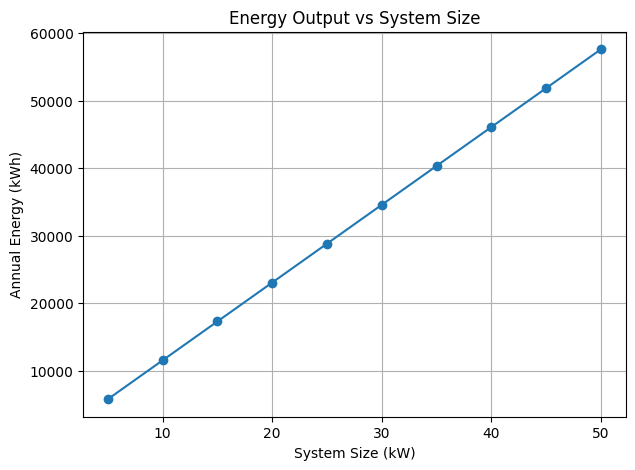

In [6]:
plt.figure(figsize=(7,5))
plt.plot(df_out["System Size (kW)"], df_out["Annual Energy (kWh)"], marker="o")
plt.xlabel("System Size (kW)")
plt.ylabel("Annual Energy (kWh)")
plt.title("Energy Output vs System Size")
plt.grid(True)
plt.savefig("../reports/optimization_energy.png", dpi=300)

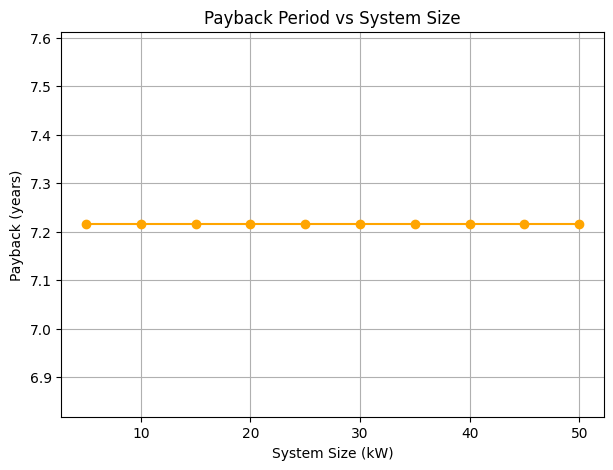

In [7]:
plt.figure(figsize=(7,5))
plt.plot(df_out["System Size (kW)"], df_out["Payback (years)"], marker="o", color="orange")
plt.xlabel("System Size (kW)")
plt.ylabel("Payback (years)")
plt.title("Payback Period vs System Size")
plt.grid(True)
plt.savefig("../reports/optimization_payback.png", dpi=300)

In [ ]:
print("📊 Optimization complete! Results saved in ../reports/optimization_results.csv")

📊 Optimization complete! Results saved in ../reports/optimization_results.csv
